# Data Analysis for Exploratory Data Analysis of Aviation Accidents

This notebook explores the prepared aviation accidents dataset to uncover patterns, trends, and important characteristics. The analysis focuses on statistical summaries, time-related insights, aircraft and operator factors, geographic patterns, and fatality data.

---
## Table of Contents

1. [Descriptive Statistics](#Descriptive-Statistics)
    - [Summary statistics of numerical columns](#Summary-statistics-of-numerical-columns)
    - [Summary statistics of categorical columns](#Summary-statistics-of-categorical-columns)
2. [Temporal Trends](#Temporal-Trends)
    - [Accidents and Fatalities Over Time](#Accidents-and-Fatalities-Over-Time)
    - [Fatalities per Accident Ratio](#Fatalities-per-Accident-Ratio)
    - [Accidents by Part of the Day](#Accidents-by-Part-of-the-Day)
    - [Accidents by Season](#Accidents-by-Season)
3. [Aircraft & Operator Analysis](#Aircraft-&-Operator-Analysis)
    - [Aircraft Types Involved in Accidents](#Aircraft-Types-Involved-in-Accidents)
    - [Passenger Aircraft Types Involved in Accidents](#Passenger-Aircraft-Types-Involved-in-Accidents)
    - [Age of Aircraft at the Time of Accident](#Age-of-Aircraft-at-the-Time-of-Accident)
    - [Aircraft Age vs Fatalities](#Aircraft-Age-vs-Fatalities)
    - [Aircraft Nature](#Aircraft-Nature)
    - [Operators Involved in Accidents](#Operators-Involved-in-Accidents)
4. [Geographic Distribution of Accidents](#Geographic-Distribution-of-Accidents)
    - [Top Countries by Number of Accidents](#Top-Countries-by-Number-of-Accidents)
    - [Mapping Accident Locations Using Latitude and Longitude](#Mapping-Accident-Locations-Using-Latitude-and-Longitude)
    - [Hemisphere-Based Accident Patterns](#Hemisphere-Based-Accident-Patterns)
5. [Conclusion](#Conclusion)


### Importing Libraries and Loading the Dataset 

To begin the analysis, we first import the necessary Python libraries and load the aviation accidents dataset. These libraries provide essential tools for data manipulation, visualization, and exploratory analysis.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set_palette("muted")
df = pd.read_feather("clean_asn_dataset.feather")

---
## Descriptive Statistics

This section explores basic statistical summaries of the dataset to understand the overall structure and distribution of key variables. This includes both numerical and categorical features such as fatalities, aircraft types, and accident phases.

### Summary statistics of numerical columns

To begin the analysis, we used `df.describe()` to explore the basic statistical properties of the numerical columns in the dataset. This includes fatalities, occupants, year_of_manufacture, and airframe_hours. The table below summarizes key statistics such as count, mean, standard deviation, and range.

In [3]:
df.drop(columns=["latitude", "longitude"]).describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
fatalities,7999.0,3.449181,17.504049,0.0,0.0,0.0,0.0,312.0
occupants,7999.0,40.815727,72.574616,0.0,2.0,6.0,44.0,560.0
year_of_manufacture,7808.0,1987.934618,15.287882,1938.0,1978.0,1989.0,1999.0,2023.0
airframe_hours,3087.0,22178.206673,21374.571752,0.0,6219.5,14597.0,32447.5,126184.0


Most aircraft involved in accidents were manufactured between the late 1970s and early 2000s. The number of fatalities per accident is generally low, with a large number of incidents having no fatalities at all.

To better understand the spread and skew of the numeric data, we visualize the distributions:

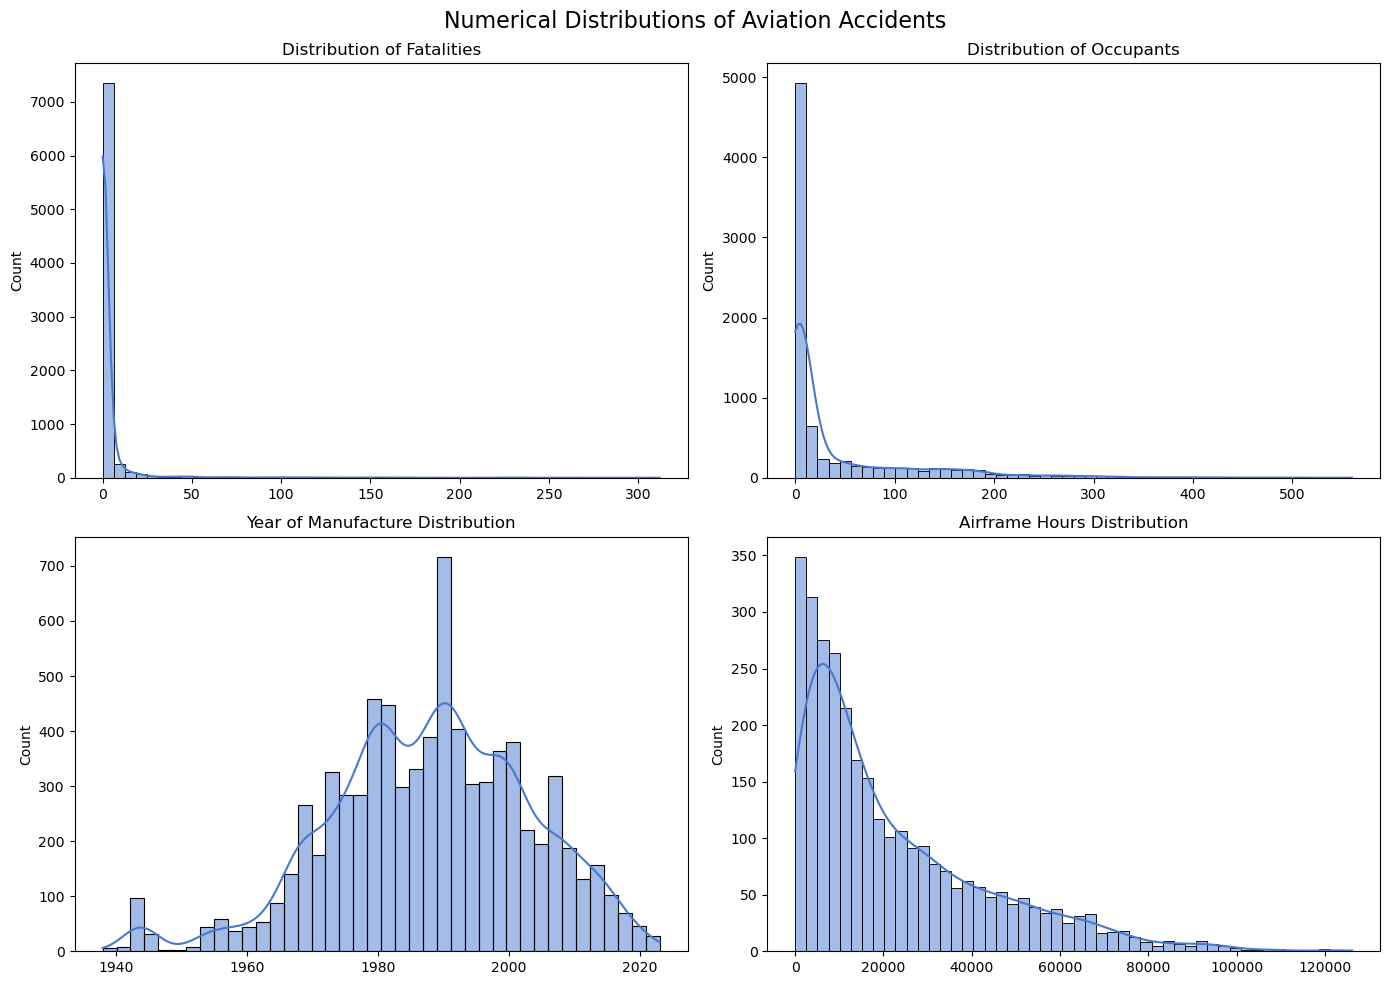

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Numerical Distributions of Aviation Accidents", fontsize=16)

sns.histplot(df["fatalities"], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title("Distribution of Fatalities")
axs[0, 0].set_xlabel("")

sns.histplot(df["occupants"], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Distribution of Occupants")
axs[0, 1].set_xlabel("")

sns.histplot(df["year_of_manufacture"].dropna(), bins=40, kde=True, ax=axs[1, 0])
axs[1, 0].set_title("Year of Manufacture Distribution")
axs[1, 0].set_xlabel("")

sns.histplot(df["airframe_hours"].dropna(), bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title("Airframe Hours Distribution")
axs[1, 1].set_xlabel("")

plt.tight_layout()
plt.show()

Most fatalities are concentrated at zero, but some rare cases exceed 100 or even 300. Occupant counts are usually low, suggesting many accidents involve small aircraft. A notable portion of aircraft have over 30,000 airframe hours, though some have relatively low usage.

### Summary statistics of categorical columns

In [5]:
df.describe(include="object").T

,count,unique,top,freq
accident_time,5310,1191,11:00:00,47
accident_type,7954,5,Accident,7295
aircraft_type,7999,1980,Cessna 208B Grand Caravan,283
aircraft_nature,7129,8,Passenger,3800
operator,7885,4057,Delta Air Lines,140
phase,7624,9,Landing,2488
departure_airport,6764,3046,"Chicago-O'Hare International Airport, IL (ORD/...",45
destination_airport,6785,3473,"Chicago-O'Hare International Airport, IL (ORD/...",54
damage_severity,7907,5,Substantial,3532
damage_outcome,5696,2,Written-Off,3966


We can see that most records are labeled as "Accident" rather than "Incident" or "Serious Incident." Passenger aircraft are the most common in the dataset. Most accidents happen during the landing phase, and many result in "Written-Off" outcomes.

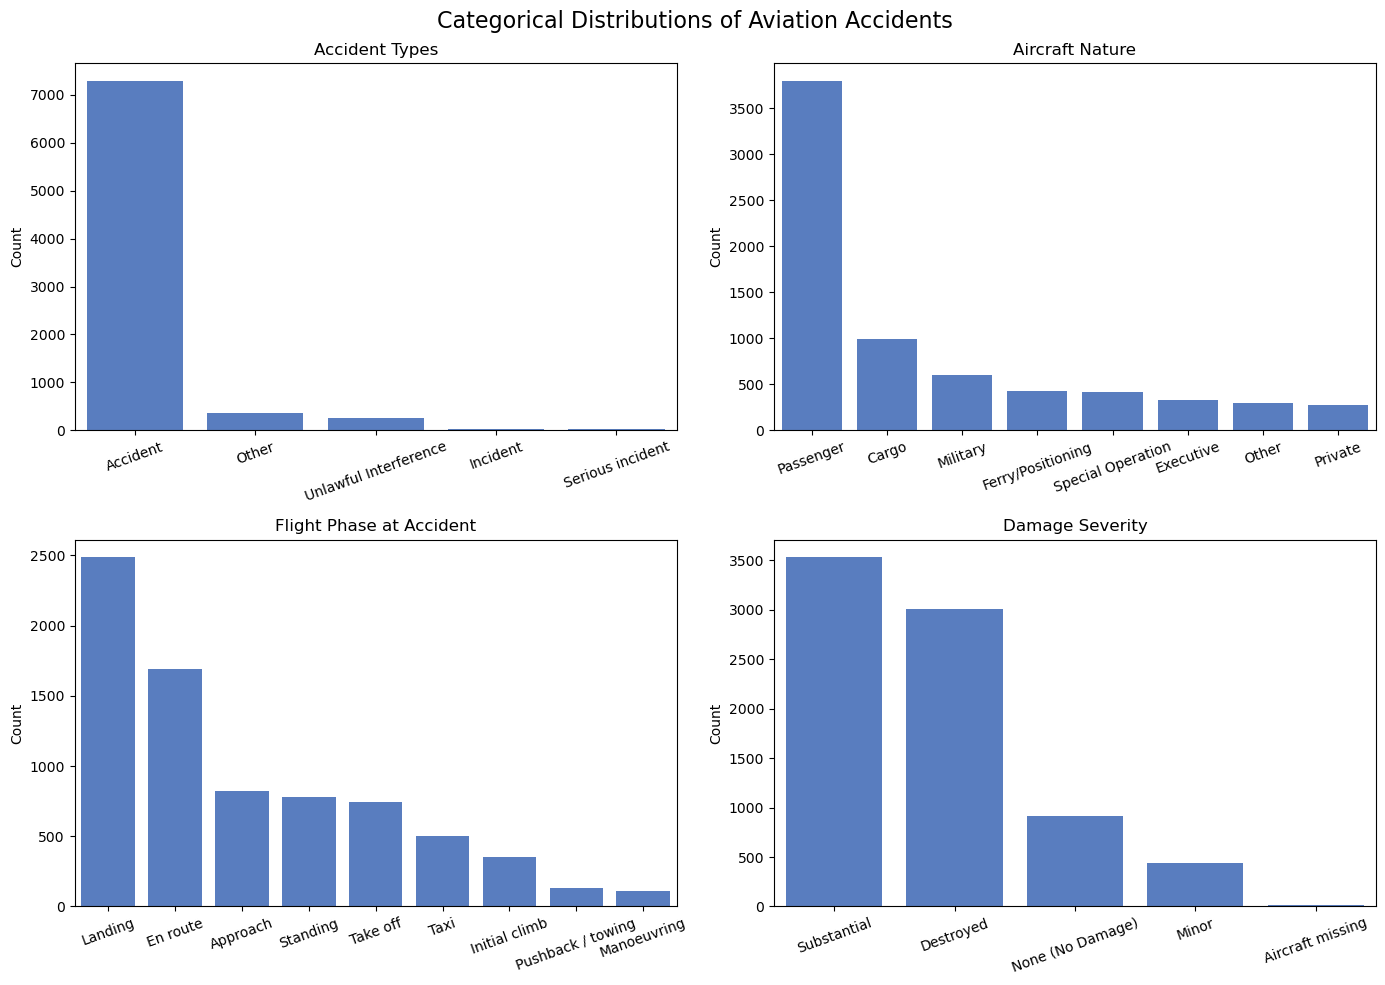

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Categorical Distributions of Aviation Accidents", fontsize=16)

accident_counts = df["accident_type"].value_counts()
sns.barplot(x=accident_counts.index, y=accident_counts.values, ax=axs[0, 0])
axs[0, 0].set_title("Accident Types")
axs[0, 0].set_xlabel("")
axs[0, 0].set_ylabel("Count")
axs[0, 0].tick_params(axis='x', rotation=20)

nature_counts = df["aircraft_nature"].value_counts()
sns.barplot(x=nature_counts.index, y=nature_counts.values, ax=axs[0, 1])
axs[0, 1].set_title("Aircraft Nature")
axs[0, 1].set_xlabel("")
axs[0, 1].set_ylabel("Count")
axs[0, 1].tick_params(axis='x', rotation=20)

phase_counts = df["phase"].value_counts()
sns.barplot(x=phase_counts.index, y=phase_counts.values, ax=axs[1, 0])
axs[1, 0].set_title("Flight Phase at Accident")
axs[1, 0].set_xlabel("")
axs[1, 0].set_ylabel("Count")
axs[1, 0].tick_params(axis='x', rotation=20)

severity_counts = df["damage_severity"].value_counts()
sns.barplot(x=severity_counts.index, y=severity_counts.values, ax=axs[1, 1])
axs[1, 1].set_title("Damage Severity")
axs[1, 1].set_xlabel("")
axs[1, 1].set_ylabel("Count")
axs[1, 1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

The bar plots show that the majority of cases in the dataset are classified as "Accidents," with very few incidents or serious incidents recorded. Passenger aircraft are the most commonly involved, followed by cargo and military types. Most accidents occurred during the landing and en route phases of flight, suggesting these are critical moments. In terms of damage, the majority of events led to substantial or total destruction of the aircraft, indicating that the dataset focuses mainly on serious aviation accidents.

---
## Temporal Trends

Understanding how aviation accidents change over time is important. In this section, we explored when accidents happened and how the number of accidents and fatalities evolved year by year and by different parts of the day or seasons.

### Accidents and Fatalities Over Time

To begin our temporal analysis, we looked at how the number of aviation accidents changed over the years. This shows us the number of aviation accidents recorded each year from 1994 to 2024. We can observe a general downward trend over time, indicating that accidents have become less frequent. Notably, there is a sharp decline after 2019, which may be related to the global reduction in air traffic due to the COVID-19 pandemic. This visual helps us understand how aviation safety has improved over the years.

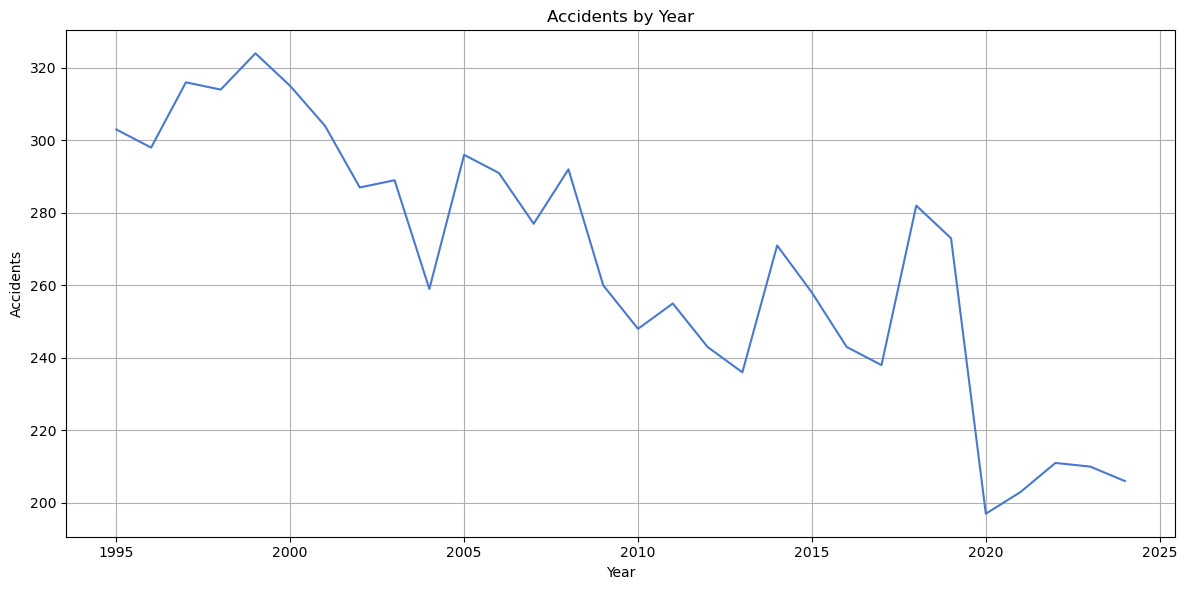

In [7]:
year_group = df.groupby(df["accident_date"].dt.year)["accident_date"].count()
year_group.plot(figsize=(12,6))
plt.title("Accidents by Year")
plt.xlabel("Year")
plt.ylabel("Accidents")
plt.grid(True)
plt.tight_layout()

Here we can see the total number of fatalities resulting from aviation accidents each year between 1994 and 2024. Although the values fluctuate, there is a clear overall decline in fatalities over time. Several spikes represent years with major accidents involving a high number of deaths. In recent years, especially after 2019, fatalities have remained relatively low, reinforcing the trend of improved aviation safety.

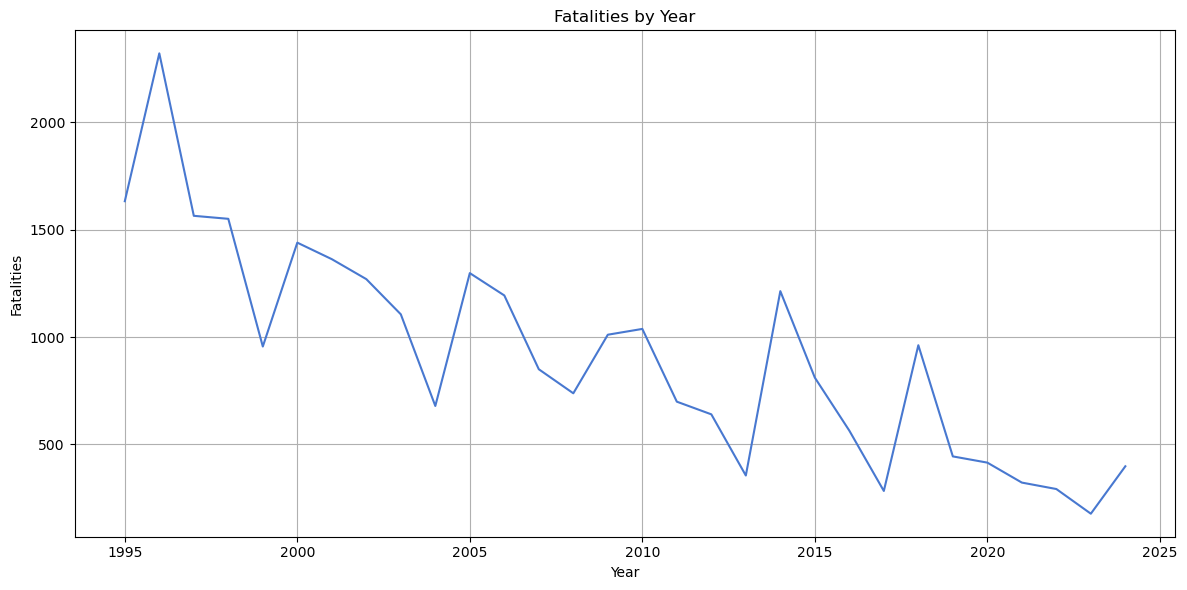

In [8]:
fatalities_group = df.groupby(df["accident_date"].dt.year)["fatalities"].sum()
fatalities_group.plot(figsize=(12,6))
plt.title("Fatalities by Year")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.grid(True)
plt.tight_layout()

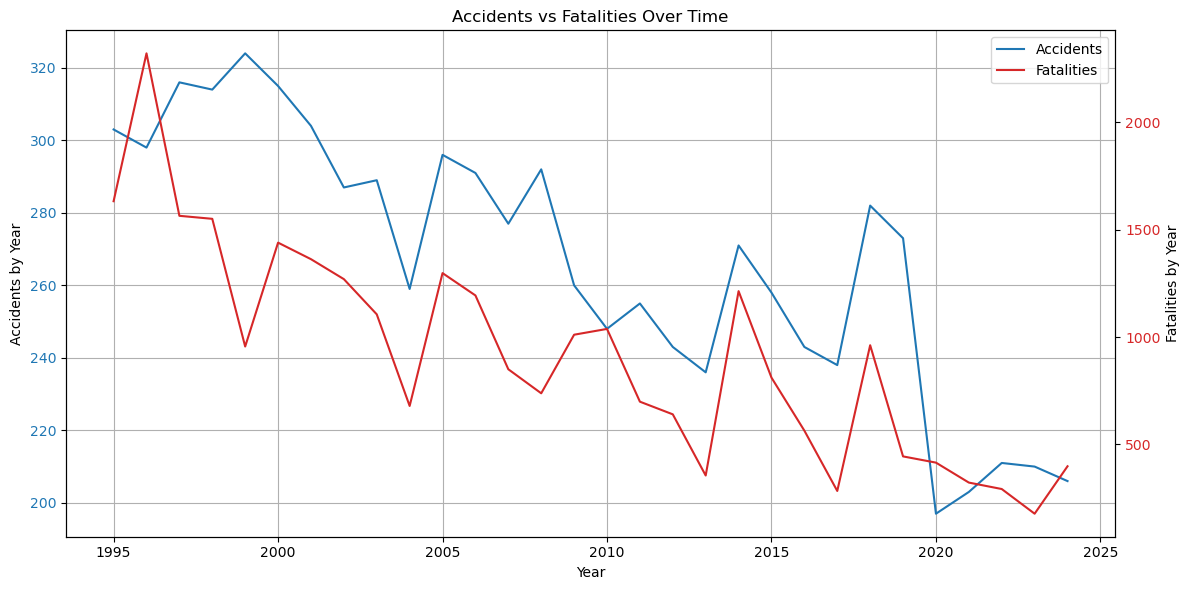

In [9]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(year_group, color="tab:blue", label="Accidents")
ax1.set_xlabel("Year")
ax1.set_ylabel("Accidents by Year")
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(fatalities_group, color="tab:red", label="Fatalities")
ax2.set_ylabel("Fatalities by Year")
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Accidents vs Fatalities Over Time')
ax1.grid(True)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
plt.tight_layout()

While both variables show a general downward trend over time, fatalities exhibit greater fluctuations year to year. In several instances, the number of fatalities drops significantly even when the number of accidents remains relatively stable, suggesting that modern aviation accidents tend to result in fewer deaths. This plot highlights improvements in both accident prevention and survivability.

### Fatalities per Accident Ratio

The overall trend is downward, indicating that accidents in recent years tend to result in fewer fatalities. Occasional spikes reflect years with rare but severe accidents.

Although this plot is related to the earlier “Fatalities by Year” graph, it presents a different perspective: instead of showing the total number of deaths, it normalizes the data by the number of accidents, offering insight into accident severity. The general similarity in shape arises because years with more total fatalities often also have more severe accidents, but this plot emphasizes the intensity rather than the frequency of fatal events.

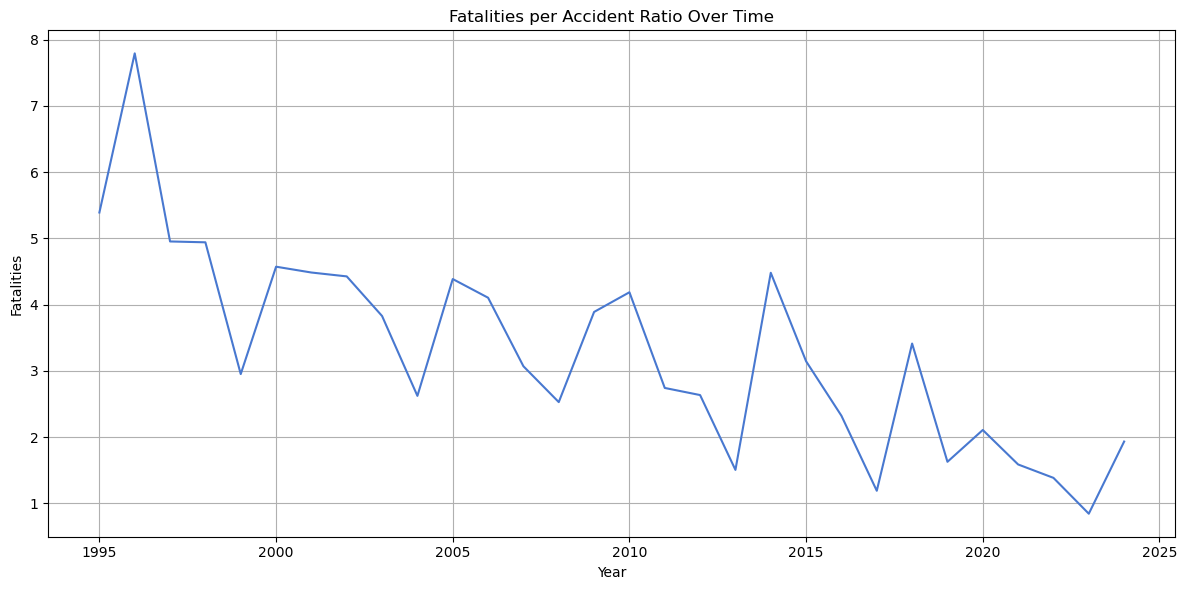

In [10]:
average_fatalities = df.groupby(df["accident_date"].dt.year)["fatalities"].mean()
average_fatalities.plot(figsize=(12,6))
plt.title("Fatalities per Accident Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.tight_layout()
plt.grid(True)

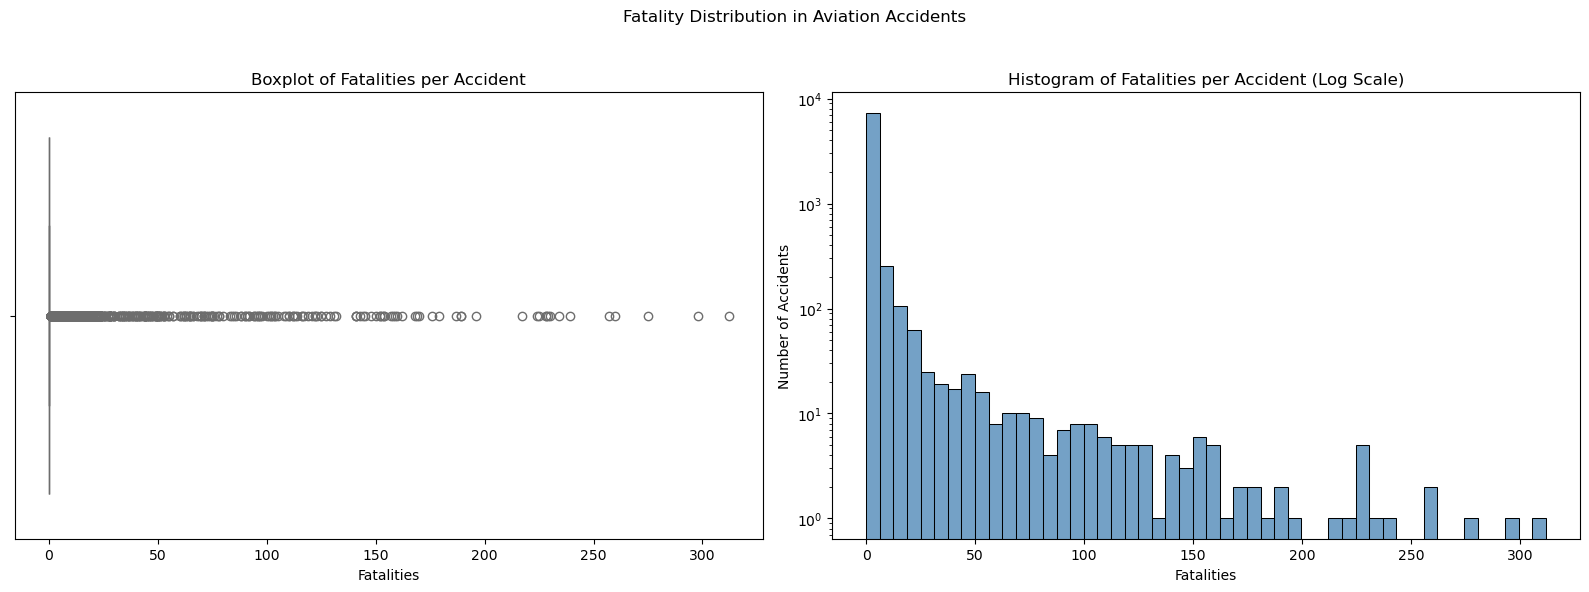

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=df["fatalities"], ax=axs[0], color="salmon")
axs[0].set_title("Boxplot of Fatalities per Accident")
axs[0].set_xlabel("Fatalities")

sns.histplot(df["fatalities"], bins=50, kde=False, ax=axs[1], color="steelblue")
axs[1].set_yscale("log")  # log scale to reveal distribution better
axs[1].set_title("Histogram of Fatalities per Accident (Log Scale)")
axs[1].set_xlabel("Fatalities")
axs[1].set_ylabel("Number of Accidents")

fig.suptitle("Fatality Distribution in Aviation Accidents")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Most aviation accidents in the dataset involved either no fatalities or just a few. This means that not all accidents are catastrophic. However, we noticed some outliers - rare but very severe crashes that resulted in over 100, and even 300 deaths. These rare events stand out in the boxplot and are barely visible in the histogram unless we use a log scale. So, while aviation accidents do happen, deadly ones are very uncommon.

### Accidents by Part of the Day

Another angle we explored was the time of day when accidents occurred. We split the day into morning, afternoon, evening, and night using the accident time. The highest number of accidents occurred in the morning, followed closely by the afternoon, while the fewest were reported at night. This pattern likely reflects the overall volume of flights, as more operations typically take place during daylight hours, increasing exposure to potential incidents.

In [12]:
def get_day_part(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    elif (21 <= hour <= 23) or (0 <= hour < 5):
        return "Night"
    else:
        return "Unknown"

In [13]:
df["accident_hour"] = pd.to_datetime(df["accident_time"], format="%H:%M:%S", errors="coerce").dt.hour
df["day_part"] = df["accident_hour"].apply(lambda x: get_day_part(x) if pd.notnull(x) else np.nan)

day_part_counts = df["day_part"].value_counts().reindex(["Morning", "Afternoon", "Evening", "Night"])

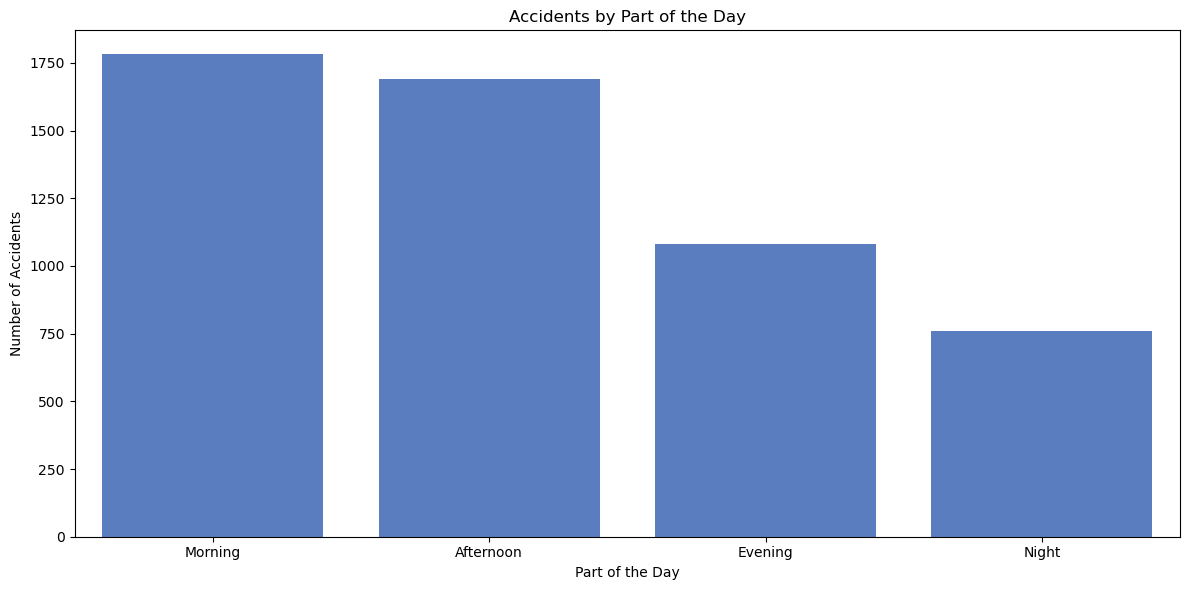

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=day_part_counts.index, y=day_part_counts.values)
plt.title("Accidents by Part of the Day")
plt.xlabel("Part of the Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

### Accidents by Season

This bar chart presents the number of aviation accidents by season, with seasonal classification adjusted based on the hemisphere of each accident location. The data shows that the highest number of accidents occurred during summer, while fall had the fewest. Although seasonal differences are relatively small, this visualization helps explore how environmental and operational factors might vary throughout the year across both hemispheres.

In [15]:
def get_season(month, lat):
    if pd.isnull(month) or pd.isnull(lat):
        return np.nan
    if lat >= 0:
        # Northern Hemisphere
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Fall"
    else:
        # Southern Hemisphere
        if month in [12, 1, 2]:
            return "Summer"
        elif month in [3, 4, 5]:
            return "Fall"
        elif month in [6, 7, 8]:
            return "Winter"
        else:
            return "Spring"

In [16]:
df["year"] = df["accident_date"].dt.year
df["month"] = df["accident_date"].dt.month
df["season"] = df.apply(lambda x: get_season(x["month"], x["latitude"]), axis=1)

season_counts = df["season"].value_counts().reindex(["Winter", "Spring", "Summer", "Fall"])

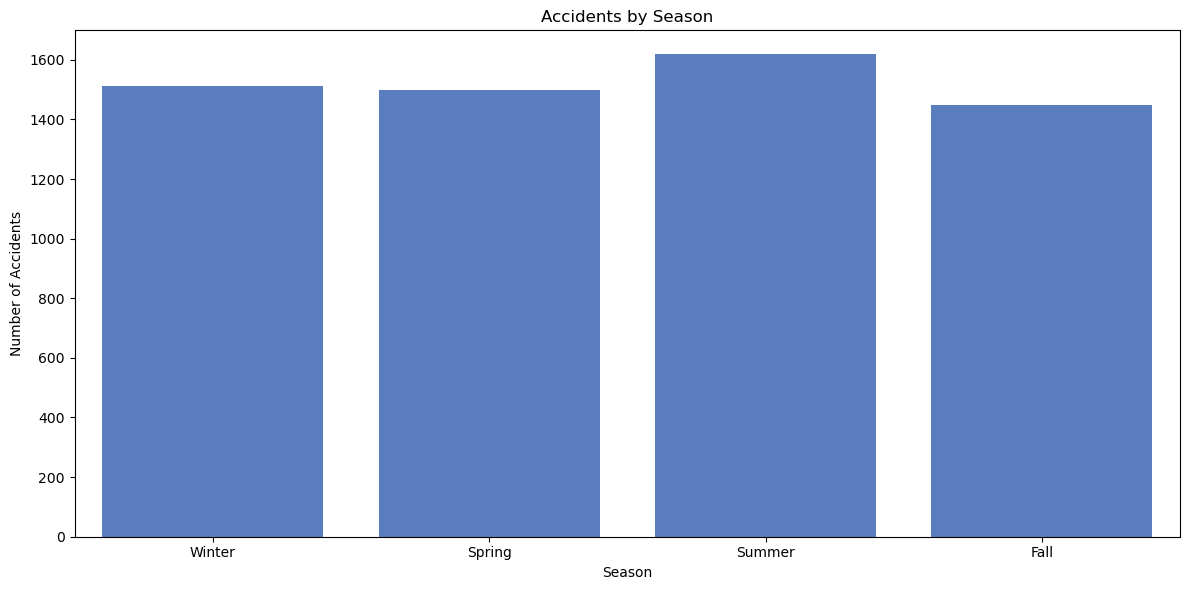

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title("Accidents by Season")
plt.xlabel("Season")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

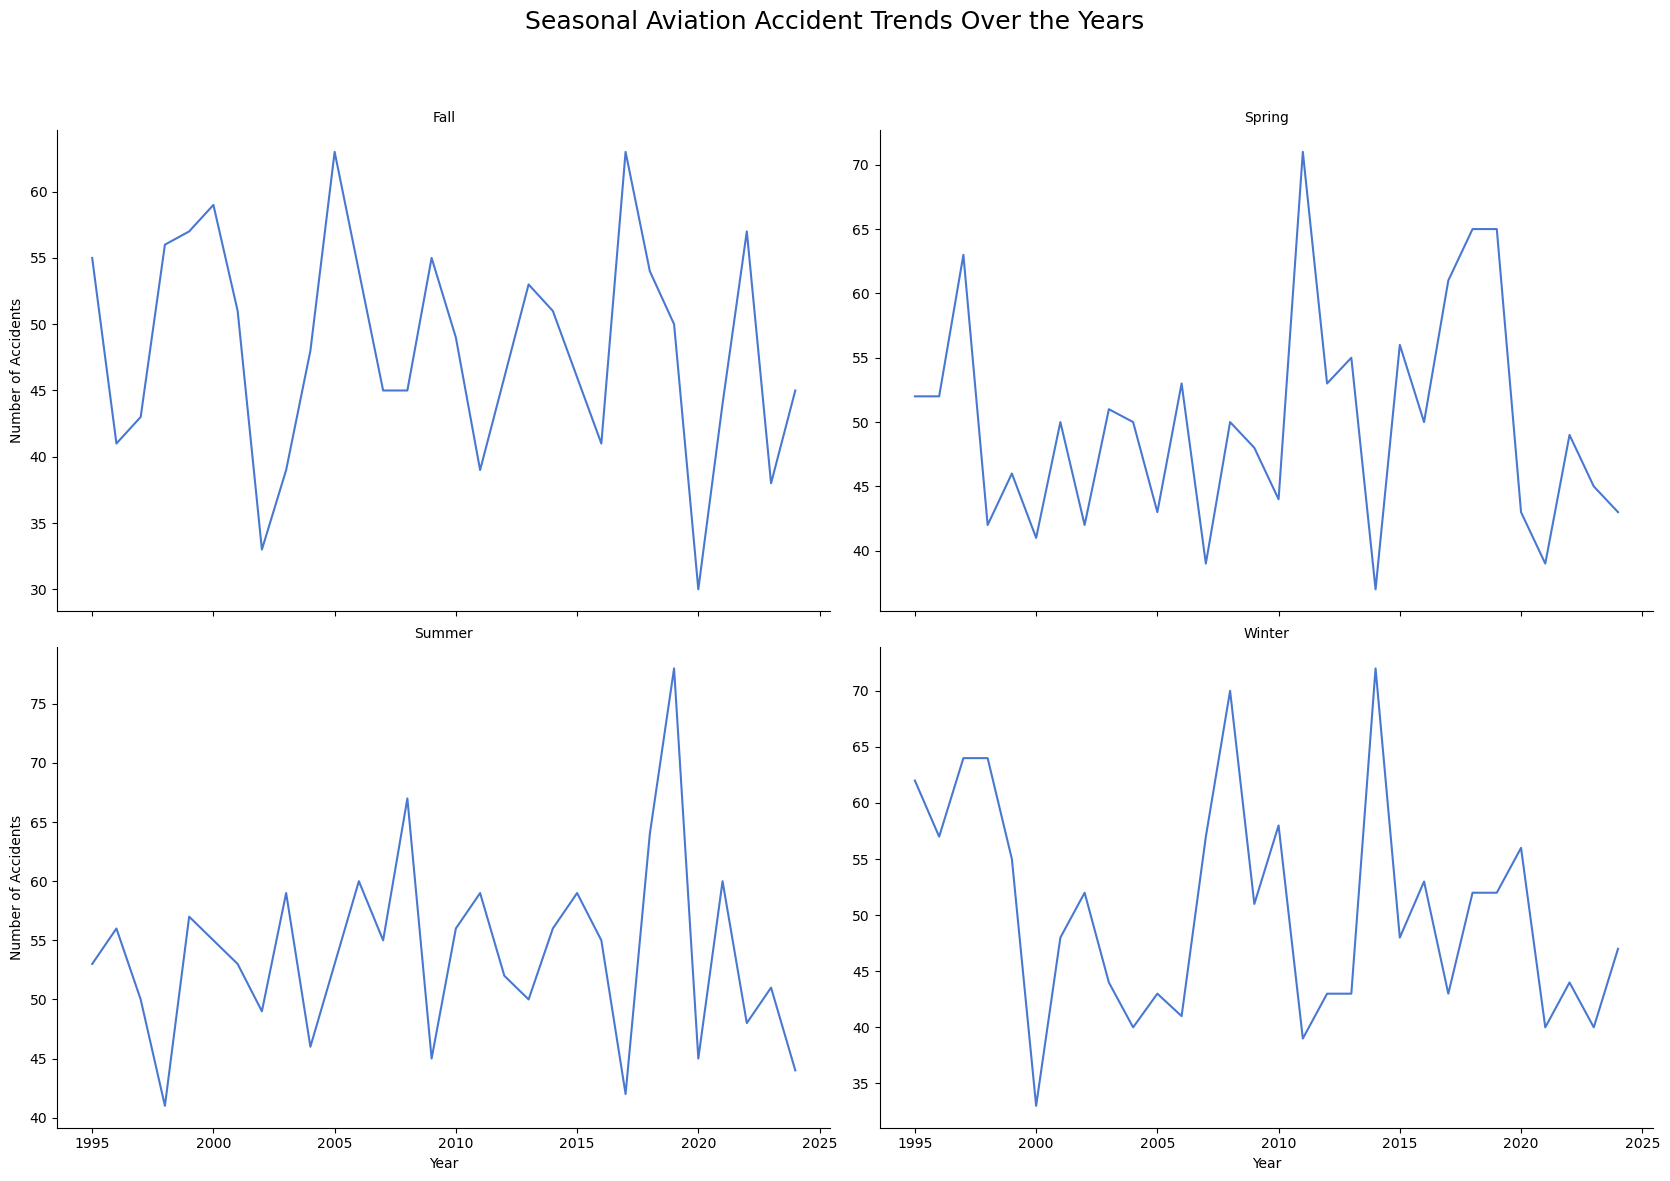

In [18]:
seasonal_trends = df.groupby(["year", "season"]).size().unstack().fillna(0)
df_melted = seasonal_trends.reset_index().melt(id_vars="year", var_name="season", value_name="accidents")

g = sns.FacetGrid(df_melted, col="season", col_wrap=2, height=6, aspect=1.4, sharey=False)
g.map_dataframe(sns.lineplot, x="year", y="accidents")

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Accidents")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Seasonal Aviation Accident Trends Over the Years", fontsize=18)

plt.show()

In winter and spring, the number of accidents mostly stays between 40 and 60, with some noticeable spikes in certain years. Summer shows more frequent and higher peaks, especially around 2019, suggesting slightly more accidents in that season. Fall has strong ups and downs, with sharp drops and high peaks, especially before 2020. Overall, all seasons show fluctuations from year to year without a clear trend.

---
## Aircraft & Operator Analysis

In this section, we explored the characteristics of aircraft involved in accidents. We wanted to understand which types of aircraft are most commonly involved, how old the aircraft were at the time of the accident, and whether certain operators are involved in more incidents than others.

### Aircraft Types Involved in Accidents

This horizontal bar chart shows the 10 aircraft models that were most frequently involved in accidents. We can see that models like the Cessna 208B Grand Caravan appear more often, possibly because they are widely used in general aviation.

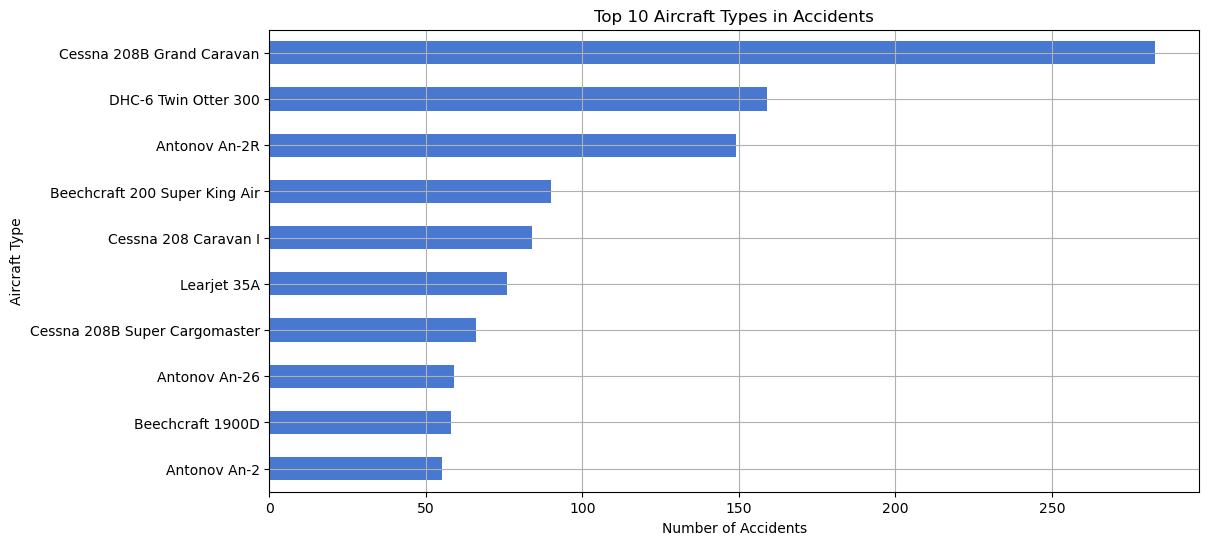

In [19]:
top_aircraft = df["aircraft_type"].value_counts().head(10)
top_aircraft.plot(kind="barh", figsize=(12,6), title="Top 10 Aircraft Types in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Passenger Aircraft Types Involved in Accidents

Compared to the earlier plot that included all aircraft natures, this one focuses specifically on passenger aircraft, which reveals a slightly different picture. While the Cessna 208B Grand Caravan remains the most frequently involved in accidents, we now see more commercially familiar aircraft in the list, such as Airbus A320, A321, and Boeing 737 models. 

These aircraft are commonly used in scheduled passenger flights around the world, so their appearance here likely reflects their high operational volume. This refined view allows us to better understand which popular passenger aircraft are most represented in accident data.

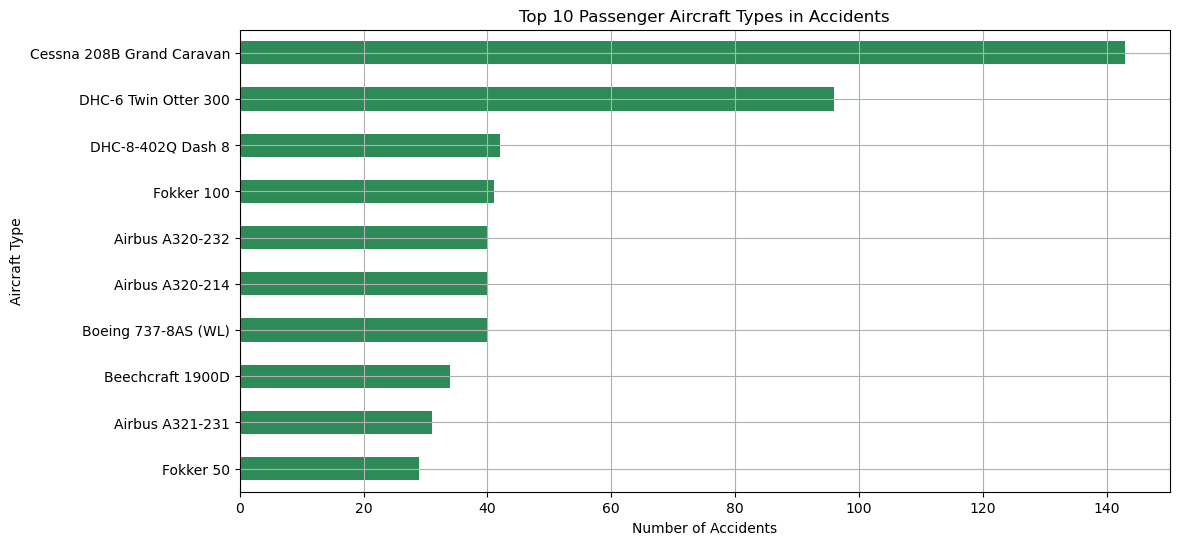

In [20]:
top_passenger_aircraft = df[df["aircraft_nature"] == "Passenger"]["aircraft_type"].value_counts().head(10)
top_passenger_aircraft.plot(kind="barh", figsize=(12,6), title="Top 10 Passenger Aircraft Types in Accidents", color="seagreen")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Type")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Age of Aircraft at the Time of Accident

To see if older planes are more prone to accidents, we calculate the aircraft age by subtracting the year of manufacture from the year of the accident.

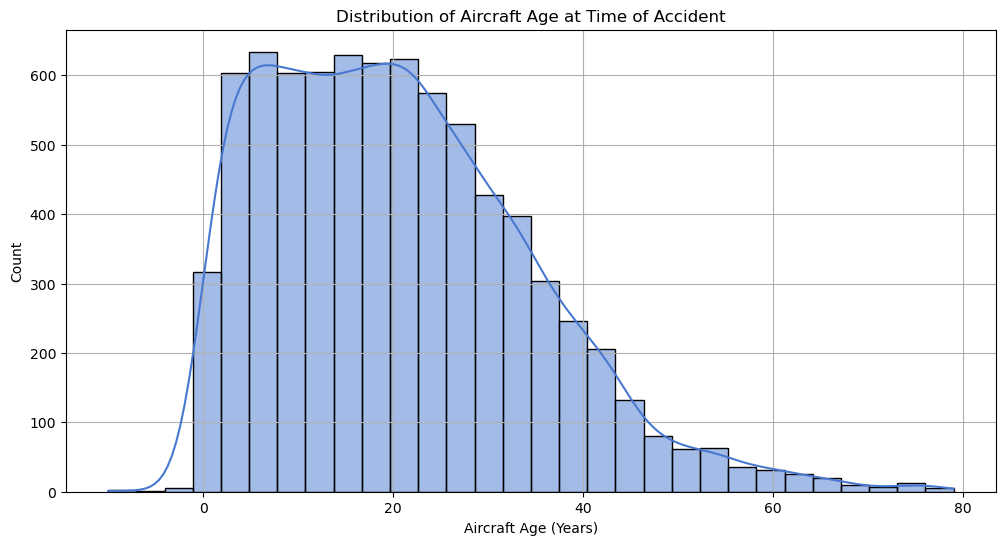

In [21]:
df["aircraft_age"] = df["accident_date"].dt.year - df["year_of_manufacture"]
plt.figure(figsize=(12,6))
sns.histplot(df["aircraft_age"].dropna(), kde=True, bins=30)
plt.title("Distribution of Aircraft Age at Time of Accident")
plt.xlabel("Aircraft Age (Years)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

This histogram shows the age of aircraft at the time of the accident. Most planes involved in accidents were between 5 and 35 years old, with a peak around 20 years. Very old aircraft are less frequent but still present.

### Aircraft Age vs Fatalities

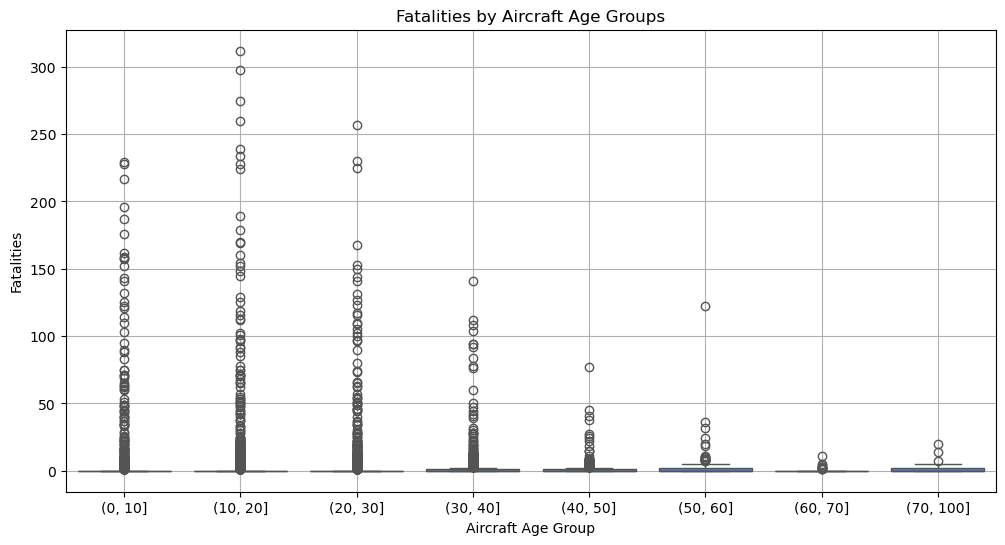

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x=pd.cut(df["aircraft_age"], bins=[0,10,20,30,40,50,60,70,100]), y="fatalities", data=df)
plt.title("Fatalities by Aircraft Age Groups")
plt.xlabel("Aircraft Age Group")
plt.ylabel("Fatalities")
plt.grid(True)
plt.savefig("aircraft-age-vs-fatalities.png")
plt.show()

This boxplot compares fatalities across aircraft age groups. Although the majority of accidents result in few or no fatalities regardless of age, we can see that some higher-fatality accidents occur in aircraft aged between 20 to 40 years, which could hint at aging-related safety concerns.

### Aircraft Nature

Aircraft in the dataset were used for different purposes such as passenger transport, cargo, military, and others.

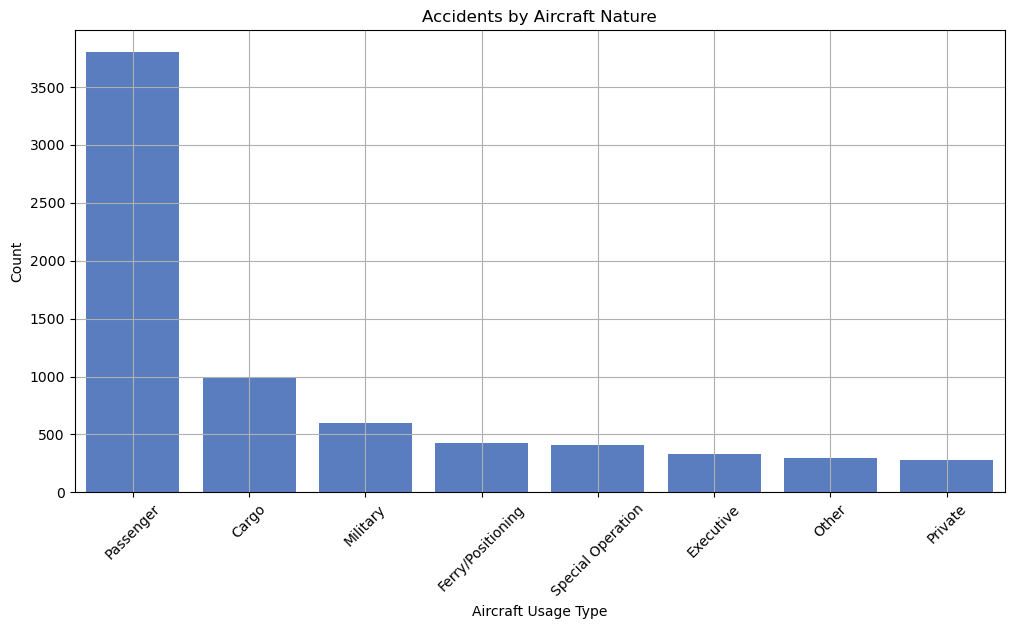

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x="aircraft_nature", data=df, order=df["aircraft_nature"].value_counts().index)
plt.title("Accidents by Aircraft Nature")
plt.xlabel("Aircraft Usage Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Most accidents involve passenger aircraft, which makes sense as they are the most common in operation. Cargo, military, and special-purpose aircraft also appear in the data but less frequently.

### Operators Involved in Accidents

Lastly, we check which operators appear most frequently in the accident records.

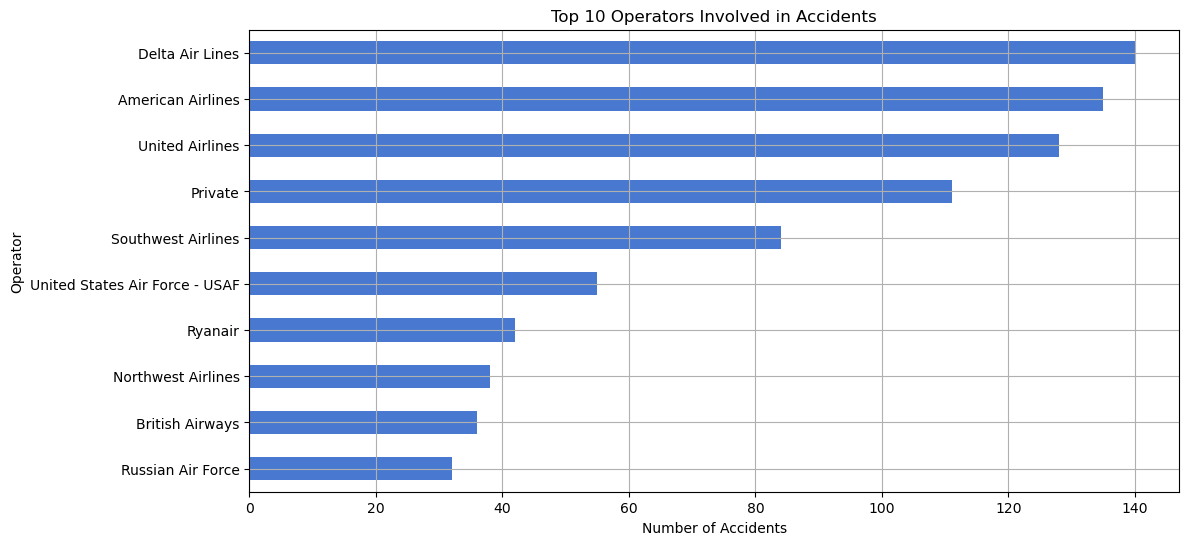

In [24]:
top_operators = df["operator"].value_counts().head(10)
top_operators.plot(kind="barh", figsize=(12,6), title="Top 10 Operators Involved in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Operator")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

This plot shows the top 10 operators with the most reported accidents. We have to note that larger or more active airlines might appear here simply because they operate more flights, not necessarily because they are less safe.

---
## Geographic Distribution of Accidents

In this section, we examined where aviation accidents occurred across the globe. This helps us identify countries or regions that are more frequently affected and spot any geographical patterns in the data. Our dataset includes location names, countries, and coordinates (latitude and longitude), which we use to generate both plots and interactive maps.

### Top Countries by Number of Accidents

To start, we looked at how many accidents happened in each country. This gives us a clear idea of which countries are most represented in the dataset.

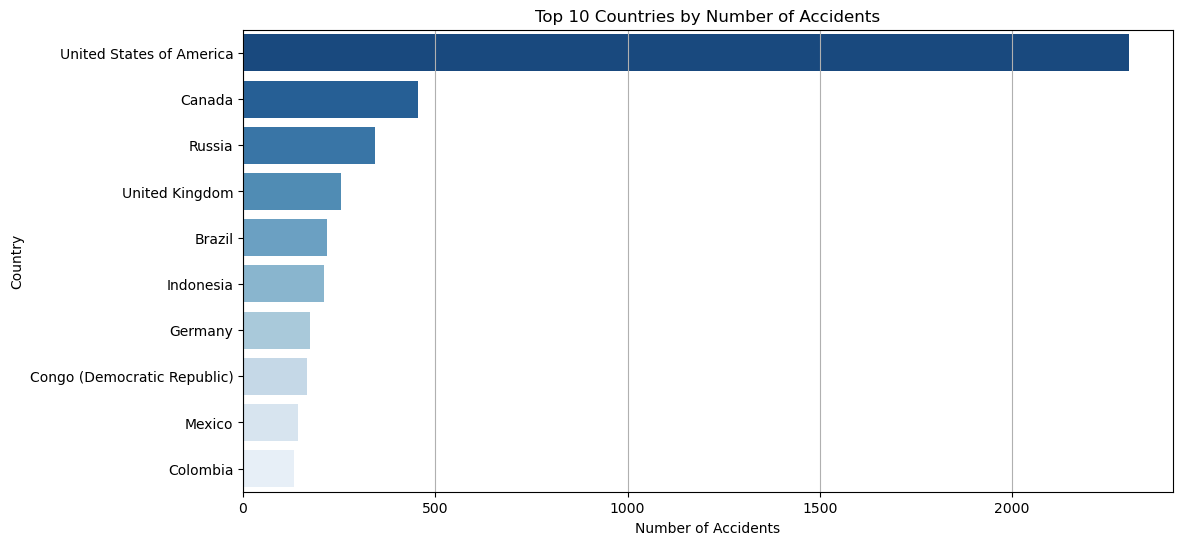

In [25]:
top_countries = df["accident_country"].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="Blues_r")
plt.title("Top 10 Countries by Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Country")
plt.grid(axis="x")
plt.show()

The bar plot shows that the United States has the highest number of recorded aviation accidents in the dataset, followed by Canada and Russia. This may partly reflect higher aviation activity or more thorough reporting systems in those countries.

### Mapping Accident Locations Using Latitude and Longitude

Next, we plotted the geographic coordinates of accidents on a world map. This gives us a visual sense of how accidents are spread globally.

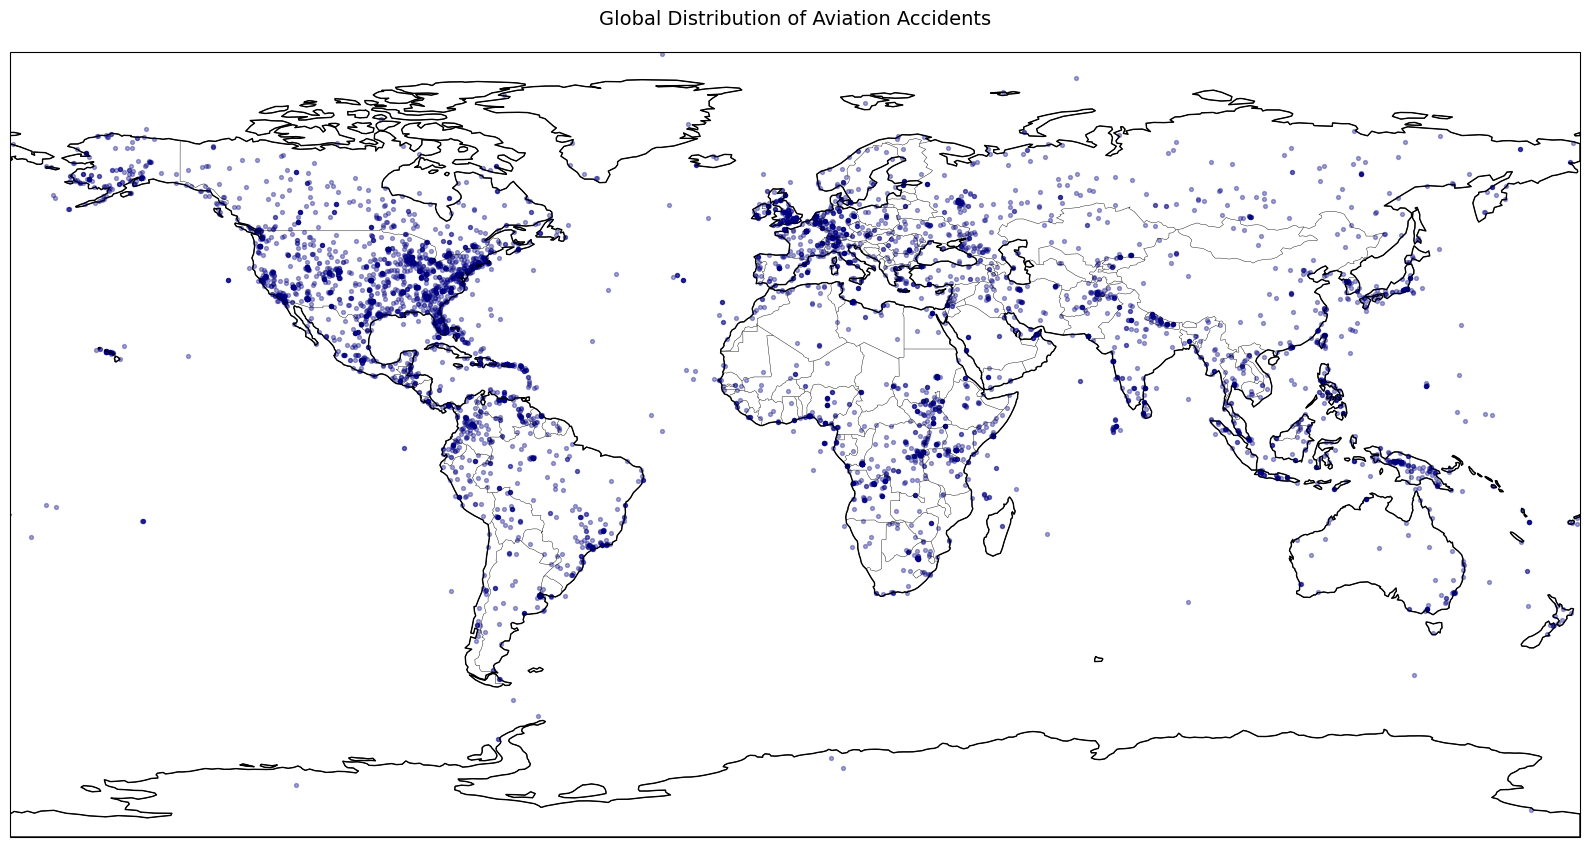

In [26]:
df_geo = df.dropna(subset=["latitude", "longitude"])

fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

ax.scatter(df_geo["longitude"], df_geo["latitude"], s=8, alpha=0.35, color="navy", transform=ccrs.PlateCarree())

plt.title("Global Distribution of Aviation Accidents", fontsize=14, pad=20)
plt.tight_layout()
plt.savefig("global-distribution-of-aviation-accidents.png")
plt.show()

We can see clear clusters of accidents over North America and Europe. This again might be due to higher flight volumes and more comprehensive incident tracking. Sparse clusters over oceans and polar regions likely represent long-distance or specialized flights.

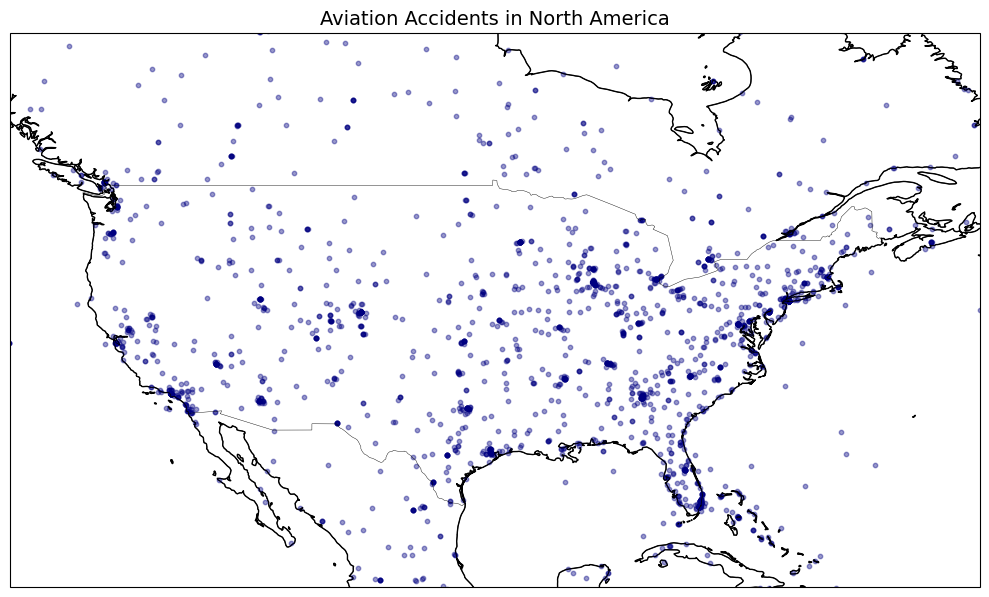

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 20, 60], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

ax.scatter(df_geo["longitude"], df_geo["latitude"], s=10, alpha=0.4, color="navy", transform=ccrs.PlateCarree())
plt.title("Aviation Accidents in North America", fontsize=14)
plt.tight_layout()
plt.savefig("aviation-accidents-north-america.png")
plt.show()

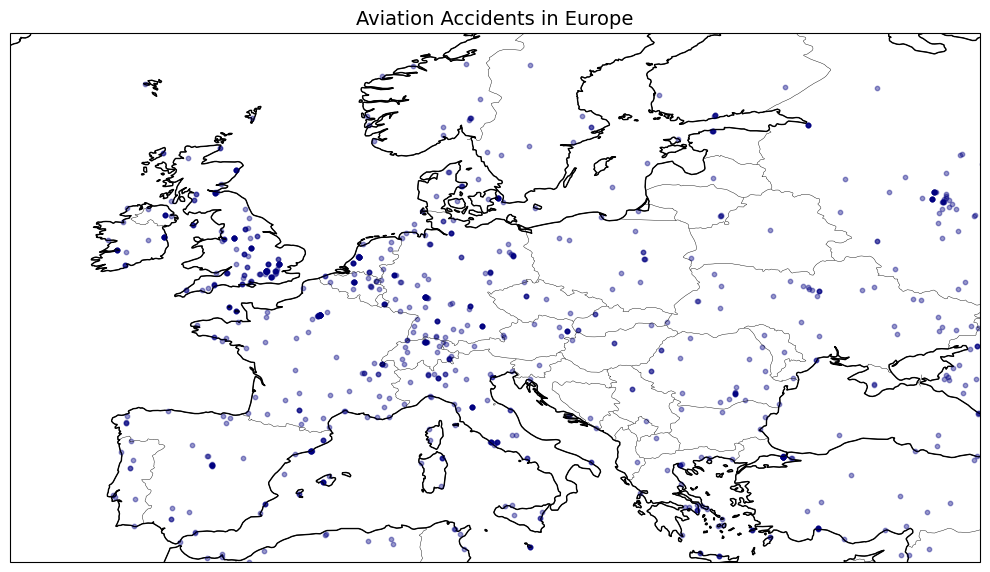

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-15, 40, 35, 65], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

ax.scatter(df_geo["longitude"], df_geo["latitude"], s=10, alpha=0.4, color="navy", transform=ccrs.PlateCarree())
plt.title("Aviation Accidents in Europe", fontsize=14)
plt.tight_layout()
plt.savefig("aviation-accidents-europe.png")
plt.show()

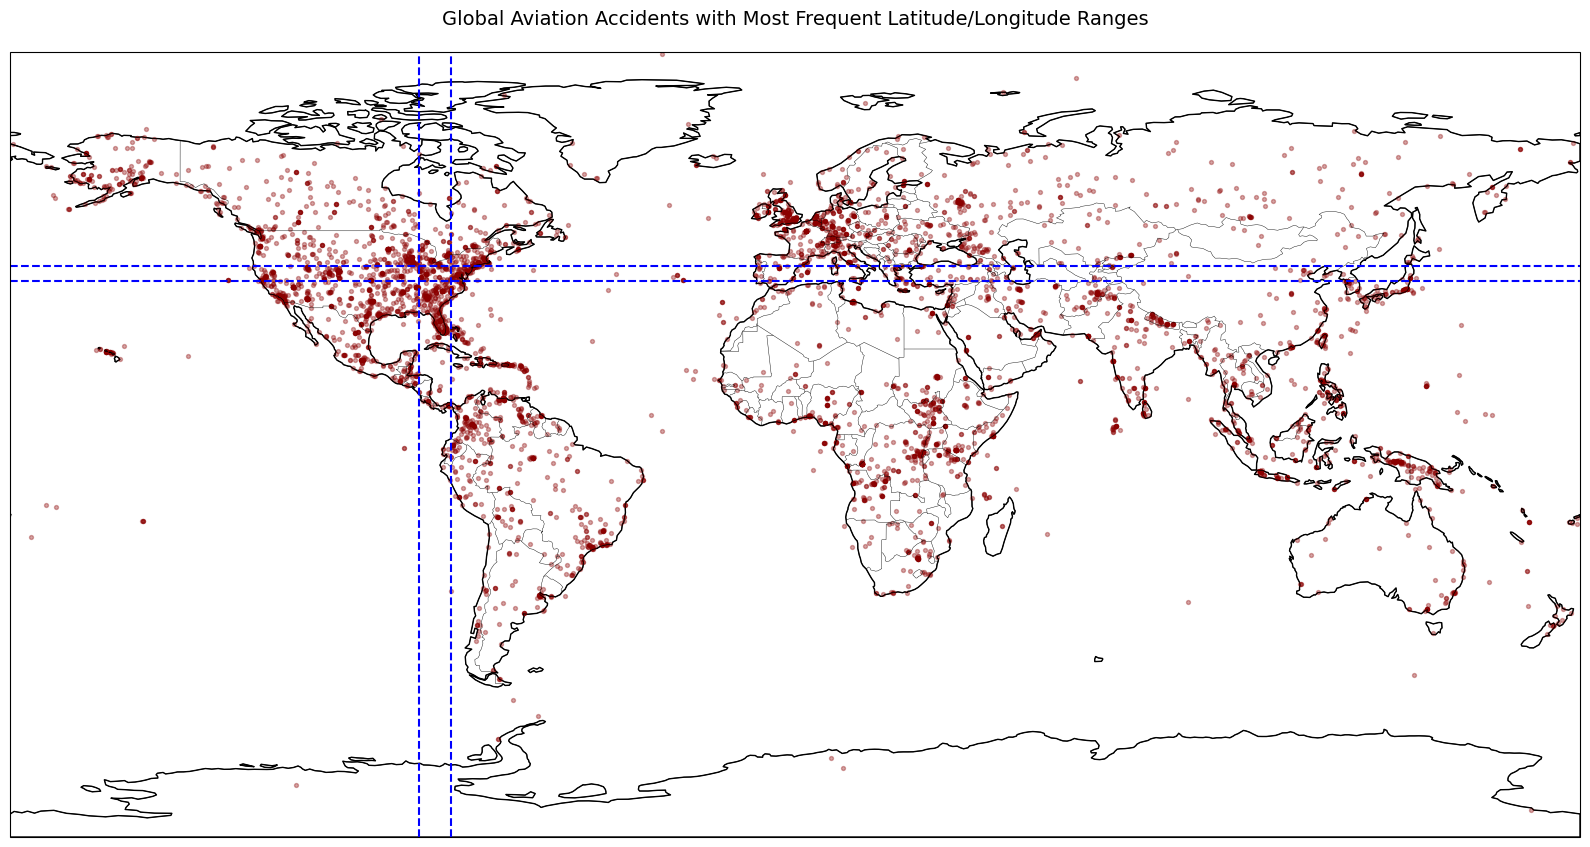

In [29]:
lat_hist = np.histogram(df_geo["latitude"], bins=50)
lon_hist = np.histogram(df_geo["longitude"], bins=50)

lat_idx = np.argmax(lat_hist[0])
lon_idx = np.argmax(lon_hist[0])

lat_min = lat_hist[1][lat_idx]
lat_max = lat_hist[1][lat_idx + 1]
lon_min = lon_hist[1][lon_idx]
lon_max = lon_hist[1][lon_idx + 1]

fig = plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.coastlines(linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

ax.scatter(df_geo["longitude"], df_geo["latitude"], s=8, alpha=0.35, color="darkred", transform=ccrs.PlateCarree())

ax.hlines([lat_min, lat_max], xmin=-180, xmax=180, colors="blue", linestyles="--", linewidth=1.5, transform=ccrs.PlateCarree())

ax.vlines([lon_min, lon_max], ymin=-90, ymax=90, colors="blue", linestyles="--", linewidth=1.5, transform=ccrs.PlateCarree())

plt.title("Global Aviation Accidents with Most Frequent Latitude/Longitude Ranges", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

### Hemisphere-Based Accident Patterns

Since we also have latitude values, we can explore whether accidents are more common in the Northern or Southern Hemisphere.

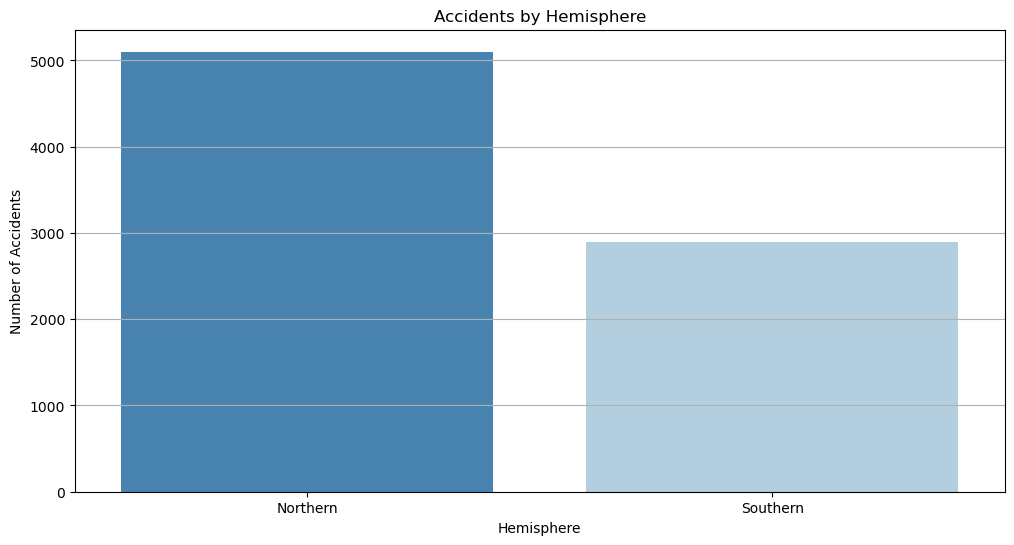

In [30]:
df["hemisphere"] = df["latitude"].apply(lambda x: "Northern" if x > 0 else "Southern")
hemisphere_counts = df["hemisphere"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=hemisphere_counts.index, y=hemisphere_counts.values, hue=hemisphere_counts.index, palette="Blues_r")
plt.title("Accidents by Hemisphere")
plt.xlabel("Hemisphere")
plt.ylabel("Number of Accidents")
plt.grid(axis="y")
plt.show()

Most accidents in the dataset occurred in the Northern Hemisphere. This is expected, as most air traffic and major aviation hubs are located there.

By analyzing the geographic distribution of accidents, we observed that incidents are concentrated in high-traffic regions like North America and Europe. Mapping coordinates allowed us to visually explore how accident locations are spread across the globe. The analysis also highlighted that most accidents occur in the Northern Hemisphere, which aligns with the distribution of global aviation activity.

---
## Conclusion

Through this data analysis, we were able to uncover many important patterns in when, where, and how aviation accidents happen. 

We found that although aviation accidents can be deadly, most of them actually result in zero or very few fatalities. The data also showed that certain aircraft types and operators appear more often, likely because they are used more frequently. When looking at time trends, we observed some changes in accident rates over the years, and seasonal patterns that vary depending on the hemisphere.

Geographically, accidents are distributed worldwide but are concentrated in certain high-traffic regions. By plotting these locations, we gained a clearer view of how accident frequency varies by country and by hemisphere.

---
<div style="text-align: right; margin-top: 40px;">
<strong>Vladyslav Lysenko</strong> &nbsp;&nbsp; <strong>Vasudha Chandna</strong> &nbsp;&nbsp; <strong>Om Mistry</strong><br>
University of Toronto School of Continuing Studies<br>
August 2025
</div>